# Hello Turing.jl

Following https://turing.ml/dev/docs/using-turing/quick-start

In [1]:
using Turing, StatsPlots, Random

In [2]:
# Set the true probability of heads in a coin.
p_true = 0.5

# Iterate from having seen 0 observations to 100 observations.
Ns = 0:100

# Draw data from a Bernoulli distribution, i.e. draw heads or tails.
Random.seed!(12)
data = rand(Bernoulli(p_true), last(Ns));

In [3]:
# Declare our Turing model.
@model function coinflip(y)
    # Our prior belief about the probability of heads in a coin.
    p ~ Beta(1, 1)

    # The number of observations.
    N = length(y)
    for n in 1:N
        # Heads or tails of a coin are drawn from a Bernoulli distribution.
        y[n] ~ Bernoulli(p)
    end
end

coinflip (generic function with 1 method)

In [4]:
# Settings of the Hamiltonian Monte Carlo (HMC) sampler.
iterations = 1000
ϵ = 0.05
τ = 10

# Start sampling.
chain = sample(coinflip(data), HMC(ϵ, τ), iterations)

Chains MCMC chain (1000×10×1 Array{Float64, 3}):

Iterations        = 1:1:1000
Number of chains  = 1
Samples per chain = 1000
Wall duration     = 7.58 seconds
Compute duration  = 7.58 seconds
parameters        = p
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std   naive_se      mcse          ess      rhat   ⋯
      Symbol   Float64   Float64    Float64   Float64      Float64   Float64   ⋯

           p    0.5199    0.0520     0.0016    0.0005   10748.2735    0.9992   ⋯
                                                                1 column omitted

Quantiles
  parameters      2.5%     25.0%     50.0%     75.0%     97.5% 
      Symbol   Float64   Float64   Float64   Float64   Float64 

           p    0.4158    0.4867    0.5182    0.5571    0.6178


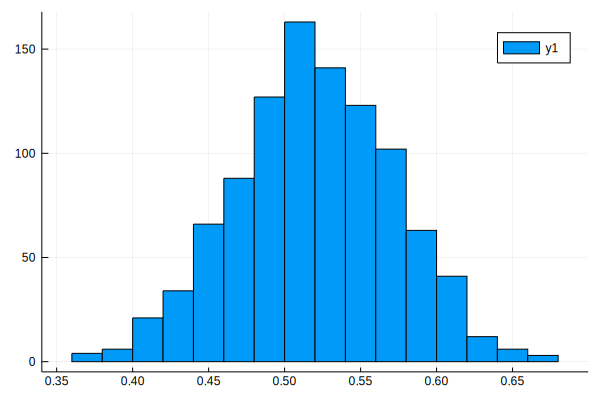

In [7]:
# Plot a summary of the sampling process for the parameter p, i.e. the probability of heads in a coin.
histogram(chain[:p])